In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
Train_data = pd.read_csv("/content/drive/MyDrive/lineardata_train.csv")
Test_data  = pd.read_csv("/content/drive/MyDrive/lineardata_test.csv")


In [ ]:
Train_data.head(10)


,target,feature 1,feature 2,feature 3,feature 4,feature 5,feature 6,feature 7,feature 8,feature 9,...,feature 11,feature 12,feature 13,feature 14,feature 15,feature 16,feature 17,feature 18,feature 19,feature 20
0,-5928.102746,-0.900470,0.850978,-2.069526,0.573887,-6.878165,1.533172,-6.163896,-18.134398,17.040815,...,-12.524825,3.376208,-19.266370,-24.347122,-21.504898,-83.231616,23.086856,-9.684523,18.211899,-16.848424
1,-738.890855,-0.266567,2.865496,-6.396780,1.517906,-0.339633,-2.173984,-7.100097,30.940664,-1.158169,...,5.686297,-6.862812,7.168795,-17.873042,-51.859538,9.262772,19.648597,6.529141,-4.577279,28.080530
2,-20186.841587,-0.058919,0.635366,-3.563216,1.848845,-4.255648,-6.495151,14.768858,20.968617,10.851276,...,16.819230,-8.112394,7.120777,4.301635,-36.838036,-408.786938,14.054136,-6.451438,-17.080408,-13.500953
3,30145.771674,-0.892483,-0.287881,-1.643086,0.630195,-2.989874,-6.706778,1.035763,42.115932,4.530884,...,-13.998268,-1.071906,40.051813,4.392608,-31.311818,534.588309,-20.380642,-1.092364,28.453693,14.643806
4,-3469.553888,-1.568419,1.535581,-4.562323,-1.953245,-3.505171,2.970568,11.589140,32.642438,-6.865592,...,10.057674,-3.719569,-52.342557,-13.150729,0.922421,-6.818339,-9.958228,12.798234,0.804627,1.271561
5,-6284.051736,-1.260712,3.036853,1.918733,2.214157,1.957066,7.978219,-5.046293,29.575808,-23.314440,...,-18.659953,-9.980004,-30.059749,12.865655,-10.557585,-42.231102,-35.692046,-13.831636,-9.262314,-18.691032
6,-15373.753706,-0.766462,0.627637,-1.271643,-0.697185,-0.069451,-4.981282,-15.215631,-18.409177,-8.485672,...,-5.895327,0.834872,-24.618700,-18.496617,52.970332,-224.664039,-16.583647,-4.880494,-5.772892,3.087271
7,6224.848304,-0.237525,3.782281,-5.670110,1.041920,1.134741,11.688859,12.115892,-5.141902,-5.640048,...,25.733965,-6.488337,20.364940,28.600771,-65.357918,130.909722,-7.280444,-2.563270,-20.165246,-19.448786
8,8560.824390,-0.607100,-5.194996,-0.682713,0.270797,-1.149809,-5.420161,11.759959,3.700489,21.654718,...,9.886708,-2.215072,-25.864651,35.354610,69.991756,94.106575,-20.088546,3.132948,31.768590,-18.301467
9,-2854.372975,1.196293,-4.025780,3.074301,-2.537228,6.331712,4.618821,22.550975,4.381451,-16.862850,...,10.356097,-1.496659,-12.446926,-40.582676,145.716369,113.250316,-18.593878,-13.172741,-63.912928,41.844928


 SPLITTING AND SHUFFLING THE TRAINING DATA

In [ ]:
np.random.seed(42)
Train_data = Train_data.iloc[np.random.permutation(len(Train_data))]


target = Train_data.iloc[:, 0]
features = Train_data.iloc[:, 1:]

# Conversion to arrays
X = features.to_numpy()
y = target.to_numpy()

# Splitting
test_size = 0.1

split_train = int(len(Train_data) * (1 - 2 * test_size))
split_cv = int(len(Train_data) * (1 - test_size))

X_train = X[:split_train]
y_train = y[:split_train]

X_cv = X[split_train:split_cv]
y_cv = y[split_train:split_cv]

X_test = X[split_cv:]
y_test = y[split_cv:]



In [ ]:
def zscore(X):
  mu = np.mean(X, axis = 0)
  std = np.std(X, axis = 0)
  X_norm = (X - mu)/std
  return X_norm, mu, std


In [ ]:
X_train_norm,train_mu,train_std =  zscore(X_train)

X_test_norm  =  (X_test-train_mu)/train_std
X_cv_norm    =  (X_cv-train_mu)/train_std

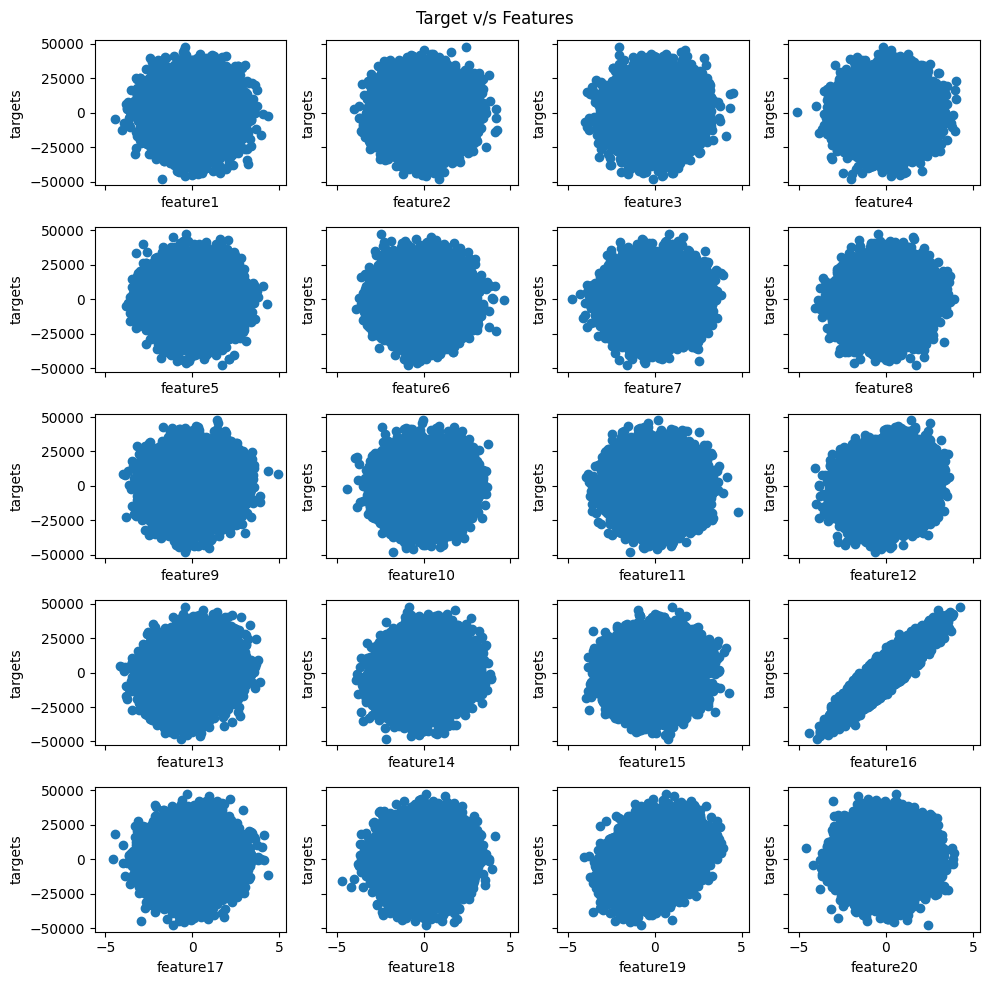

In [ ]:
nrows=5
ncols=4
fig , axes = plt.subplots(nrows = 5 , ncols = 4 , figsize =(10,10) , sharex =True , sharey = True)
for i in range(nrows):
  for j in range(ncols):
   axes[i ,j].scatter(X_train_norm[:,(i*ncols + j)] , y_train )
   axes[i, j].set_xlabel("feature" + str(i*ncols + j +1))
   axes[i, j].set_ylabel("targets")
plt.suptitle("Target v/s Features")
plt.tight_layout()
plt.show()

In [ ]:
def predict(X ,w ,b):
  y = np.dot(X ,w) + b
  return y

In [ ]:
def compute_cost(X, y, W, b):
    m = X.shape[0]

    f_wb = np.dot(X, W) + b

    cost = np.sum((f_wb - y) ** 2) / (2 * m)

    return cost

In [ ]:
def compute_gradient(X, y, W, b):
    m = X.shape[0] # number of examples

    f_wb = np.dot(X, W) + b
    errors = f_wb - y

    dj_dw = np.dot(errors, X) / m
    dj_db = np.sum(errors) / m

    return dj_dw, dj_db


In [ ]:
def gradient_descent(X, y, w_in, b_in, num_iters, alpha):
    W = w_in
    b = b_in
    J_history = []

    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient(X, y, W, b)
        W -= alpha * dj_dw
        b -= alpha * dj_db

        if i % 100 == 0:
            cost = compute_cost(X, y, W, b)
            print(f"Iteration {i}, Cost: {cost}")
            J_history.append(cost)

    cost = compute_cost(X, y, W, b)
    print(f"Iteration {num_iters}, Cost: {cost}")
    J_history.append(cost)

    return W, b, J_history



In [ ]:
W_in  = np.zeros(X.shape[1],)
b_in  = 0.
alpha = 0.1
num_iters = 1000

W_out, b_out ,cost_history  = gradient_descent(X_train_norm, y_train, W_in, b_in, num_iters, alpha )
print(f"\nupdated parameters: w:{W_out}, b:{b_out}")


Iteration 0, Cost: 52983426.54369947
Iteration 100, Cost: 0.04407124486632905
Iteration 200, Cost: 0.005074040078273539
Iteration 300, Cost: 0.005074040043649125
Iteration 400, Cost: 0.005074040043648406
Iteration 500, Cost: 0.005074040043648406
Iteration 600, Cost: 0.005074040043648406
Iteration 700, Cost: 0.005074040043648406
Iteration 800, Cost: 0.005074040043648406
Iteration 900, Cost: 0.005074040043648406
Iteration 1000, Cost: 0.005074040043648406

updated parameters: w:[2.19924856e+01 3.31552018e+01 9.96317433e+00 6.05406395e+00
 1.75415338e+02 3.31003160e+02 2.54212161e+02 9.05105082e+02
 4.36375571e+02 8.38533000e+01 1.21211330e+02 1.60735925e+03
 1.67734713e+03 1.31070003e+03 5.99866236e+02 1.05398158e+04
 5.05444542e+02 6.77617411e+02 3.16676470e+03 2.30019069e+02], b:66.33231550387701


In [ ]:
def r2score(y_train , y_pred):
  tss = np.sum((y_train - np.mean(y_train))**2)
  ssr = sum((y_train[i] - y_pred[i]) ** 2 for i in range(len(y_train)))
  r2 = 1 - (ssr/tss)
  return r2


In [ ]:
y_pred_train = predict(X_train_norm , W_out , b_out)
r2_train = r2score(y_train, y_pred_train)
print(f'Cost on training set : {cost_history[-1]}')
print(f"\nR2 score on training set : {r2_train}")


Cost on training set : 0.005074040043648406

R2 score on training set : 0.9999999999224729


In [ ]:
cost = compute_cost(X_cv_norm , y_cv , W_out ,b_out)
y_cv_pred = predict(X_cv_norm , W_out , b_out)
r2_cv = r2score(y_cv, y_cv_pred)
print(f'Cost on cross validation set = {cost}')
print(f'\nR2 score on cross validation set : {r2_cv}')


Cost on cross validation set = 0.005003283516623078

R2 score on cross validation set : 0.9999999999235262


In [ ]:
cost = compute_cost(X_test_norm , y_test , W_out ,b_out )
y_test_pred = predict(X_test_norm , W_out , b_out)
r2_test = r2score(y_test, y_test_pred)
print(f'Cost on test set = {cost}')
print(f'\nR2 score on test set: {r2_test}')

Cost on test set = 0.004919975960777203

R2 score on test set: 0.9999999999256693


Text(0.5, 1.0, 'Cost vs No. Of Iterations')

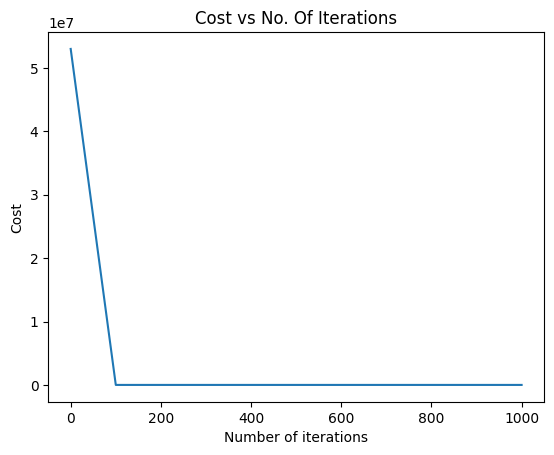

In [ ]:
plt.plot(range(0, 1001 ,100) , cost_history)
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.title("Cost vs No. Of Iterations")


In [ ]:
print(Test_data.head())

      ID  feature 1  feature 2  feature 3  feature 4  feature 5  feature 6  \
0  14189   0.634260  -0.771727   4.297694  -2.022710   0.487001   2.316767   
1  14742   0.456128   3.154433   0.182006  -0.730634  -5.759530   1.448589   
2  13905   0.390815  -5.278284   1.625943  -1.775914  -2.461865   1.439888   
3  10072   1.067949   4.851061   3.909243   2.005500   2.880720   1.054944   
4  14879  -0.589611  -3.533016  -1.705736   2.063013  -0.738696   2.475443   

   feature 7  feature 8  feature 9  ...  feature 11  feature 12  feature 13  \
0  11.626397 -10.657142   9.254734  ...   -8.728623    7.035966    5.828558   
1 -10.292540  20.441249   9.943525  ...   -4.899841   20.762134   -4.117988   
2   6.213269 -17.212310 -17.308743  ...    8.239316    6.588928   27.017658   
3  -1.652801  -4.267849   3.860784  ...   -4.580152    5.748974    6.949329   
4  -4.982819 -19.693204   0.660739  ...    2.222820  -11.731821   -8.069874   

   feature 14  feature 15  feature 16  feature 17  featu

In [25]:
X = Test_data.iloc[ : , 1 : ].to_numpy()
norm_X = zscore(X)[0]
y_predicted = predict(norm_X , W_out , b_out)
print(y_predicted)

[ -5431.04777556  17660.53684669   4682.53521279 ...   9526.46235247
 -15145.90208575  -1426.39611658]
